In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, LSTM, GRU, AveragePooling1D, GlobalAveragePooling1D, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D, AveragePooling1D 
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

### 보간

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
보간 = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/잠수교_유량_수위_보간/청담대교_cuve_fit.csv', encoding = 'cp949')
보간

,날짜,잠수교_수위,잠수교_유량,청담대교_수위,청담대교_유량,한강대교_수위,한강대교_유량,행주대교_수위,행주대교_유량
0,2012-05-01 00:00:00,300.2,0.0,310.7,469.05,290.0,729.80,275.3,540.18
1,2012-05-01 00:10:00,300.2,0.0,314.7,498.00,290.0,731.48,275.3,540.18
2,2012-05-01 00:20:00,301.2,0.0,313.7,490.68,290.0,726.42,275.3,540.18
3,2012-05-01 00:30:00,301.2,0.0,311.7,476.21,290.0,726.42,276.3,552.17
4,2012-05-01 00:40:00,301.2,0.0,311.7,476.21,291.0,707.17,277.3,564.29
...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10:00,0.0,NaN,0.0,319.84,0.0,-456.41,0.0,974.40
276332,2022-07-18 23:20:00,0.0,NaN,0.0,314.01,0.0,-717.30,0.0,1006.88
276333,2022-07-18 23:30:00,0.0,NaN,0.0,387.55,0.0,-843.37,0.0,1039.90
276334,2022-07-18 23:40:00,0.0,NaN,0.0,454.91,0.0,-1023.37,0.0,1073.46


In [5]:
보간 = 보간['한강대교_수위']
보간.isnull().sum()

0

### Arima

In [6]:
Arima = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/newdata.csv', encoding = 'cp949')
Arima

,날짜,현재수위,공용량,청담대교_유량,한강대교_유량,행주대교_유량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위,방류량_시간차,강화대교_조위_시간차,서울시강수량
0,2012-05-01 00:00,24.800,24.93,469.05,729.80,540.18,310.7,300.2,290.0,275.3,575.70,193.0,0.0
1,2012-05-01 00:10,24.794,25.15,498.00,731.48,540.18,314.7,300.2,290.0,275.3,575.30,199.0,0.0
2,2012-05-01 00:20,24.789,25.31,490.68,726.42,540.18,313.7,301.2,290.0,275.3,555.00,207.0,0.0
3,2012-05-01 00:30,24.789,25.31,476.21,726.42,552.17,311.7,301.2,290.0,276.3,575.70,215.0,0.0
4,2012-05-01 00:40,24.789,25.31,476.21,707.17,564.29,311.7,301.2,291.0,277.3,575.40,226.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,31.14,319.84,-456.41,974.40,0.0,0.0,0.0,0.0,258.67,407.0,0.0
276332,2022-07-18 23:20,25.040,31.14,314.01,-717.30,1006.88,0.0,0.0,0.0,0.0,258.58,431.0,0.0
276333,2022-07-18 23:30,25.040,31.14,387.55,-843.37,1039.90,0.0,0.0,0.0,0.0,258.56,453.0,0.0
276334,2022-07-18 23:40,25.040,31.14,454.91,-1023.37,1073.46,0.0,0.0,0.0,0.0,258.65,476.0,0.0


In [7]:
Arima = Arima['한강대교_수위']
Arima.isnull().sum()

0

In [8]:
Arima

0         290.0
1         290.0
2         290.0
3         290.0
4         291.0
          ...  
276331      0.0
276332      0.0
276333      0.0
276334      0.0
276335      0.0
Name: 한강대교_수위, Length: 276336, dtype: float64

### CNN

In [9]:
CNN = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/CNN_전처리/한강대교_수위.csv', encoding = 'cp949')
CNN

,한강대교_수위
0,290.0
1,290.0
2,290.0
3,290.0
4,291.0
...,...
276331,0.0
276332,0.0
276333,0.0
276334,0.0


### CNN-LSTM

In [29]:
CNNLSTM = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/CNN_전처리/59개 5열-5.csv', usecols = [3], encoding = 'cp949')
CNNLSTM

,한강대교_수위
0,290.0
1,290.0
2,290.0
3,290.0
4,291.0
...,...
276331,278.0
276332,278.0
276333,277.0
276334,276.0


### 시각화

In [30]:
# 연속적인 결측치 구간
consecutive = list(range(140613, 140671))
consecutive

[140613,
 140614,
 140615,
 140616,
 140617,
 140618,
 140619,
 140620,
 140621,
 140622,
 140623,
 140624,
 140625,
 140626,
 140627,
 140628,
 140629,
 140630,
 140631,
 140632,
 140633,
 140634,
 140635,
 140636,
 140637,
 140638,
 140639,
 140640,
 140641,
 140642,
 140643,
 140644,
 140645,
 140646,
 140647,
 140648,
 140649,
 140650,
 140651,
 140652,
 140653,
 140654,
 140655,
 140656,
 140657,
 140658,
 140659,
 140660,
 140661,
 140662,
 140663,
 140664,
 140665,
 140666,
 140667,
 140668,
 140669,
 140670]

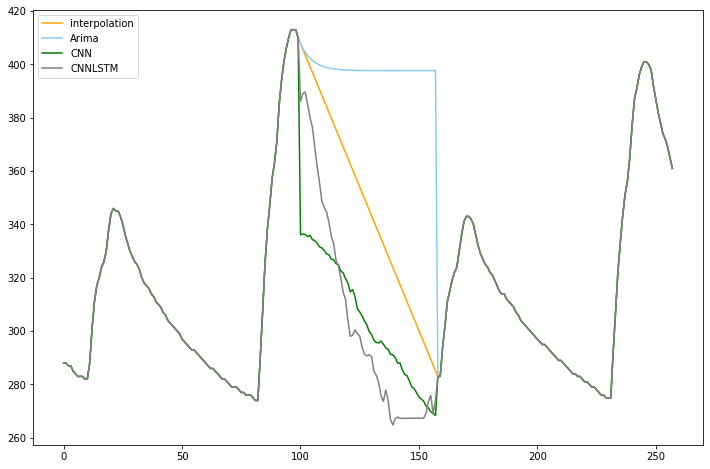

In [31]:
col = [보간, Arima, CNN, CNNLSTM]

start = consecutive[0]-100
end = consecutive[-1]+100
x = range(len(보간.loc[start:end]))
fig = plt.figure(figsize = (12, 8))

y1 = 보간.loc[start:end]
y2 = Arima.loc[start:end]
y3 = CNN.loc[start:end]
y4 = CNNLSTM.loc[start:end]

ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y1, color = 'orange', label = 'interpolation')
ax.plot(x, y2, color = 'skyblue', label = 'Arima')
ax.plot(x, y3, color = 'green', label = 'CNN')
ax.plot(x, y4 , color = 'grey', label = 'CNNLSTM')
plt.legend()

plt.show()